In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from random import randint
from numpy import array, shape
pd.options.mode.chained_assignment = None

 #!/usr/bin/python
    import time
    import datetime
    import logging
    
    logger = logging.getLogger()
    
    def setup_file_logger(log_file):
        hdlr = logging.FileHandler(log_file)
        formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
        hdlr.setFormatter(formatter)
        logger.addHandler(hdlr) 
        logger.setLevel(logging.INFO)
    
    def log(message):
        #outputs to Jupyter console
        print('{} {}'.format(datetime.datetime.now(), message))
        #outputs to file
        logger.info(message)
    
    setup_file_logger('out.log')
    
    for i in range(10000):
        log('Doing hard work here i=' + str(i))
        log('Taking a nap now...')
        time.sleep(1000)


In [16]:
#Lecture du fichier des vols d'avion de 2015
vols=pd.read_csv('flights.csv', low_memory=False)

In [3]:
#Aperçu des données
vols.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Type des données
vols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   int64
MONTH                  int64
DAY                    int64
DAY_OF_WEEK            int64
AIRLINE                object
FLIGHT_NUMBER          int64
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE               int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL      int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED               int64
CANCELLED              int64
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT

In [5]:
vols["CANCELLED"].value_counts()

0    5729195
1      89884
Name: CANCELLED, dtype: int64

In [ ]:
#Peu de vols étaient annulés!

In [6]:
#Statistiques des données par attribut
vols.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [7]:
#Données des aéroports... non homogènes !
vols["ORIGIN_AIRPORT"].value_counts()/len(vols["ORIGIN_AIRPORT"])

ATL      5.960325e-02
ORD      4.912874e-02
DFW      4.116648e-02
DEN      3.369176e-02
LAX      3.345426e-02
SFO      2.543495e-02
PHX      2.522994e-02
IAH      2.519677e-02
LAS      2.288696e-02
MSP      1.926714e-02
MCO      1.907209e-02
SEA      1.905783e-02
DTW      1.864556e-02
BOS      1.853335e-02
EWR      1.748937e-02
CLT      1.724053e-02
LGA      1.711697e-02
SLC      1.670539e-02
JFK      1.612128e-02
BWI      1.479255e-02
MDW      1.390014e-02
DCA      1.268139e-02
FLL      1.265217e-02
SAN      1.206497e-02
MIA      1.191615e-02
PHL      1.134561e-02
TPA      1.098215e-02
DAL      1.025918e-02
HOU      8.943340e-03
BNA      8.176552e-03
             ...     
11617    9.451668e-06
13127    9.107971e-06
11587    9.107971e-06
14109    9.107971e-06
12343    9.107971e-06
11525    9.107971e-06
10739    9.107971e-06
10333    9.107971e-06
12255    9.107971e-06
12888    9.107971e-06
12177    9.107971e-06
10918    9.107971e-06
11447    8.420577e-06
13964    6.186546e-06
ITH      5

In [18]:
#Vérifier si les données sont consistantes
missing_values =vols.isnull().sum()
missing_values #Données manquantes par attribut

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [19]:
#Suppression des données manquantes sur l'arrivée
vols = vols.dropna(axis=0,subset=["ARRIVAL_DELAY"])

In [20]:
#Vérifier encore une fois les données
missing_values =vols.isnull().sum()
missing_values #Données manquantes par attribut

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER                  0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
TAXI_OUT                     0
WHEELS_OFF                   0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
AIR_TIME                     0
DISTANCE                     0
WHEELS_ON                    0
TAXI_IN                      0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
ARRIVAL_DELAY                0
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5714008
AIR_SYSTEM_DELAY       4650569
SECURITY_DELAY         4650569
AIRLINE_DELAY          4650569
LATE_AIRCRAFT_DELAY    4650569
WEATHER_DELAY          4650569
dtype: int64

In [21]:
#faa_code=pd.read_csv("faa_code.csv", low_memory=False).loc[:,["Code","AIRPORT"]]
#airports=pd.read_csv("airports.csv", low_memory=False).loc[:,["IATA_CODE","AIRPORT"]]

#Lecture du fichier des correspondances entre code iata et code faa, avec un pet changement sur l'index
iata_faa=pd.read_csv("correspondance.csv", low_memory=False).reset_index().set_index('ORIGIN_AIRPORT_CODE').drop('index',axis=1)

In [13]:
#faa_code.head()

#Aperçu des correspondances
iata_faa.head()

,IATA
ORIGIN_AIRPORT_CODE,
10135,ABE
10136,ABI
10140,ABQ
10141,ABR
10146,ABY


In [15]:
#Résoudre le problème de correspondance entre le code faa et le code iata

In [16]:
#Les deux colonnes AIRPORT sont de type object dans les deux DataFrame
#airports['AIRPORT'] = airports['AIRPORT'].values.astype(str)
#faa_code['AIRPORT'] = faa_code['AIRPORT'].values.astype(str)

In [17]:
#Le tableau de correspondance entre les deux types de code d'aereports
#iata_faa = airports.set_index('AIRPORT').join(faa_code.set_index('AIRPORT'),on='AIRPORT',how='inner')
#iata_faa.head()

In [22]:
#Création d'un dictionnaire pour faire le remplacement des données d'aéroports
code2iata = iata_faa.to_dict()['IATA']
#Et changement de types
str_keys = list(map(lambda x : str(x) , code2iata.keys()))
str_code2iata = dict(zip(list(str_keys), list(code2iata.values())))

In [ ]:
code2iata

In [22]:
str_code2iata['14747']

'SEA'

In [23]:
#vols[vols['ORIGIN_AIRPORT']].head() #isnumeric()

#Données à nettoyer
vols[vols['ORIGIN_AIRPORT'].str.isnumeric()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4385712,2015,10,1,4,AA,1230,N3DBAA,14747,11298,5,...,543.0,-19.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385713,2015,10,1,4,DL,1805,N696DL,14771,13487,5,...,528.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385714,2015,10,1,4,NK,612,N602NK,12889,13487,5,...,448.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385715,2015,10,1,4,AA,260,N3GNAA,12892,13303,10,...,813.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385716,2015,10,1,4,AA,1982,N914UY,14771,11057,10,...,750.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385717,2015,10,1,4,UA,684,N495UA,14771,13930,14,...,602.0,-33.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385718,2015,10,1,4,UA,1171,N68452,12892,13930,14,...,614.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385719,2015,10,1,4,AA,448,N179UW,14869,11057,15,...,602.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385720,2015,10,1,4,AA,2406,N859AA,12892,11298,15,...,510.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385721,2015,10,1,4,DL,1617,N809DN,12892,13487,20,...,543.0,-7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#vols.iloc[4385713].replace(str_code2iata)['ORIGIN_AIRPORT']

'SFO'

In [23]:
# Make sure all Origin and departing airports are strings
vols['ORIGIN_AIRPORT'] = vols['ORIGIN_AIRPORT'].values.astype(str)
vols['DESTINATION_AIRPORT'] = vols['DESTINATION_AIRPORT'].values.astype(str)

In [33]:
vols[vols['ORIGIN_AIRPORT'].str.isnumeric()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4385747,2015,10,1,4,UA,1162,N73259,10732,EWR,208,...,554.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385752,2015,10,1,4,EV,2704,N905EV,11982,DFW,500,...,533.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385753,2015,10,1,4,HA,102,N485HA,12173,ITO,500,...,547.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385761,2015,10,1,4,AA,1044,N014AA,12266,MIA,500,...,857.0,34.0,0,0,NaN,26.0,0.0,8.0,0.0,0.0
4385764,2015,10,1,4,AA,1500,N3MEAA,10721,ORD,500,...,646.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385765,2015,10,1,4,AA,1583,N3LBAA,10721,DFW,500,...,757.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385766,2015,10,1,4,AA,2274,N3HUAA,13487,DFW,500,...,735.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385769,2015,10,1,4,AA,1852,N711UW,10721,CLT,500,...,708.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385770,2015,10,1,4,AA,2454,N3KNAA,10721,MIA,500,...,822.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385779,2015,10,1,4,MQ,3336,N537MQ,12191,DFW,500,...,605.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#vols['ORIGIN_AIRPORT'] = vols['ORIGIN_AIRPORT'].replace(str_code2iata)
vols[vols['ORIGIN_AIRPORT'].str.isnumeric()]=vols[vols['ORIGIN_AIRPORT'].str.isnumeric()].replace(str_code2iata)

In [25]:
#Après remplacement
vols["ORIGIN_AIRPORT"].value_counts()/len(vols["ORIGIN_AIRPORT"])

ATL      0.065806
ORD      0.053224
DFW      0.044318
DEN      0.037011
LAX      0.036687
SFO      0.027929
PHX      0.027728
IAH      0.027496
LAS      0.025304
MSP      0.021282
SEA      0.021095
MCO      0.020745
DTW      0.020454
BOS      0.020108
CLT      0.019004
EWR      0.018874
SLC      0.018418
LGA      0.018075
JFK      0.017486
BWI      0.016157
MDW      0.015100
DCA      0.013710
FLL      0.013709
SAN      0.013205
MIA      0.012991
PHL      0.012393
TPA      0.011936
DAL      0.011296
HOU      0.009768
PDX      0.008981
           ...   
GUC      0.000083
ADQ      0.000081
BGR      0.000064
GUM      0.000063
IAG      0.000058
MQT      0.000056
OTH      0.000052
PBG      0.000051
BGM      0.000045
PUB      0.000044
WYS      0.000036
MVY      0.000036
CNY      0.000036
VEL      0.000035
CEC      0.000030
UST      0.000028
MMH      0.000025
PPG      0.000020
ADK      0.000017
ILG      0.000017
HYA      0.000014
DLG      0.000013
STC      0.000013
GST      0.000013
AKN      0

In [26]:
vols[vols['DESTINATION_AIRPORT'].str.isnumeric()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4391937,2015,10,1,4,B6,1191,N247JB,JFK,10154,1118,...,1214.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4394215,2015,10,1,4,B6,1338,N187JB,JFK,13541,1337,...,1449.0,11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4396107,2015,10,1,4,EV,4892,N881AS,DTW,10577,1526,...,1643.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4401790,2015,10,1,4,EV,5420,N752EV,LGA,10581,2150,...,2340.0,25.0,0,0,NaN,0.0,0.0,0.0,25.0,0.0
4401798,2015,10,1,4,EV,4896,N842AS,DTW,10577,2151,...,2305.0,-6.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4408562,2015,10,2,5,B6,1191,N281JB,JFK,10154,1118,...,1246.0,24.0,0,0,NaN,0.0,0.0,2.0,22.0,0.0
4410834,2015,10,2,5,B6,1338,N337JB,JFK,13541,1337,...,1435.0,-3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4412718,2015,10,2,5,EV,4892,N926EV,DTW,10577,1526,...,1642.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4414905,2015,10,2,5,B6,1491,N306JB,JFK,10154,1736,...,1910.0,23.0,0,0,NaN,14.0,0.0,7.0,2.0,0.0
4417089,2015,10,2,5,EV,5603,N398CA,DTW,10581,1948,...,2325.0,101.0,0,0,NaN,0.0,0.0,101.0,0.0,0.0


In [27]:
vols.to_csv("flights3.csv")

In [54]:
vols=pd.read_csv('flights3.csv', low_memory=False)

In [42]:
vols.drop("Unnamed: 0",axis=1)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,806,N3730B,SFO,MSP,25,...,610.0,8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,NK,612,N635NK,LAS,MSP,25,...,509.0,-17.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,US,2013,N584UW,LAX,CLT,30,...,753.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AA,1112,N3LAAA,SFO,DFW,30,...,532.0,-13.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,...,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:

vols[vols['ORIGIN_AIRPORT'].str.isnumeric()]

,Unnamed: 0,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
4385747,4385747,2015,10,1,4,UA,1162,N73259,10732,EWR,...,554.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385752,4385752,2015,10,1,4,EV,2704,N905EV,11982,DFW,...,533.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385753,4385753,2015,10,1,4,HA,102,N485HA,12173,ITO,...,547.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385761,4385761,2015,10,1,4,AA,1044,N014AA,12266,MIA,...,857.0,34.0,0,0,NaN,26.0,0.0,8.0,0.0,0.0
4385764,4385764,2015,10,1,4,AA,1500,N3MEAA,10721,ORD,...,646.0,-1.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385765,4385765,2015,10,1,4,AA,1583,N3LBAA,10721,DFW,...,757.0,-23.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385766,4385766,2015,10,1,4,AA,2274,N3HUAA,13487,DFW,...,735.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385769,4385769,2015,10,1,4,AA,1852,N711UW,10721,CLT,...,708.0,-2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385770,4385770,2015,10,1,4,AA,2454,N3KNAA,10721,MIA,...,822.0,3.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4385779,4385779,2015,10,1,4,MQ,3336,N537MQ,12191,DFW,...,605.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
len(vols['DESTINATION_AIRPORT'])

5819079

In [ ]:
vols_tester = vols[vols['MONTH'] == 2]

In [ ]:
iata_faa.loc[iata_faa['Code']==vols_tester['ORIGIN_AIRPORT'][2]]

In [ ]:
vols_tester.head()

In [ ]:
nbr_vols= len(vols)
for i in range(nbr_vols):
    
    if len(vols['ORIGIN_AIRPORT'][i]) != 3:
        to_replace = vols['ORIGIN_AIRPORT'][i]
        value = iata_faa.loc[iata_faa['Code']==vols['ORIGIN_AIRPORT'][i]]['IATA_CODE']
        vols = vols.replace(to_replace, value)
        print('replaced',to_replace,'with',value)
    elif len(vols['DESTINATION_AIRPORT'][i]) != 3:
        to_replace =vols['DESTINATION_AIRPORT'][i]
        value = iata_faa.loc[iata_faa['Code']==vols['DESTINATION_AIRPORT'][i]]['IATA_CODE']
        vols = vols.replace(to_replace, value)
        print('replaced',to_replace,'with',value)

In [ ]:
nbr_vols = len(vols)
n = len(iata_faa)-1
for i in range(nbr_vols):
    if len(vols['ORIGIN_AIRPORT'][i]) != 3:
        to_replace = vols['ORIGIN_AIRPORT'][i]
        j = 0
        while ((j<n)&(to_replace!=iata_faa.loc[j,"Code"])):
            j+=1
        if (j<n):
            value = iata_faa.loc[j,"IATA_CODE"]
            vols = vols.replace(to_replace, value)
            print('replaced',to_replace,'with',value)
        else:
            print('not replaced')
    
    if len(vols['DESTINATION_AIRPORT'][i]) != 3:
        to_replace =vols['DESTINATION_AIRPORT'][i]
        j = 0
        while ((j<n)&(to_replace!=iata_faa.loc[j,"Code"])):
            j+=1
        if (j<n):
            value = iata_faa.loc[j,"IATA_CODE"]
            vols = vols.replace(to_replace, value)
            print('replaced',to_replace,'with',value)
        else:
            print('not replaced')

In [ ]:
nbr_vols = len(vols)
for i in range(nbr_vols):
    
    if len(vols['ORIGIN_AIRPORT'][i]) != 3:
        to_replace = vols['ORIGIN_AIRPORT'][i]
        value = iata_faa.loc[iata_faa['IATA_CODE']==vols['ORIGIN_AIRPORT'][i]]['IATA_CODE']
        vols = vols.replace(to_replace, value)
        print('replaced',to_replace,'with',value)
    elif len(vols['DESTINATION_AIRPORT'][i]) != 3:
        to_replace =vols['DESTINATION_AIRPORT'][i]
        value = iata_faa.loc[iata_faa['IATA_CODE']==vols['DESTINATION_AIRPORT'][i]]['IATA_CODE']
        vols = vols.replace(to_replace, value)
        print('replaced',to_replace,'with',value)

In [ ]:
vols["ORIGIN_AIRPORT"].value_counts()/len(vols["ORIGIN_AIRPORT"])

In [ ]:
#Nombre de retards au départ par aéroports d'origine
vols[(vols["DEPARTURE_DELAY"] > 0)]["ORIGIN_AIRPORT"].value_counts()

In [ ]:
#Nombre de retards au départ par compagnie aérienne
Retards_compagnies = vols[(vols["DEPARTURE_DELAY"] > 0)]["AIRLINE"].value_counts()
print(Retards_compagnies)

In [ ]:
#Calcul du retard maximum pour chaque compagnie
Data = vols[(vols["DEPARTURE_DELAY"] > 0)][["AIRLINE","DEPARTURE_DELAY"]]
n = len(Data)
Liste = Retards_compagnies.index.tolist()
Liste
n_liste = len(Liste)
Liste_max = n_liste*[0]

for i in range(0,n):
    j=0
    while (j<n_liste)&(Data.iloc[i,0]!=Liste[j]):
        j+=1
    if (Data.iloc[i,1]>Liste_max[j]):
        Liste_max[j]=Data.iloc[i,1]



In [ ]:
(Liste,Liste_max)

In [ ]:
Compagnies = vols[(vols["DEPARTURE_DELAY"] > 0)]["AIRLINE"].index.tolist()

z=vols[(vols["DEPARTURE_DELAY"] > 0)]["AIRLINE"].value_counts()
base_list = z.index.tolist()

data = [
    go.Heatmap(
        z=z,
        x=base_list,
        y=Compagnies,
        colorscale='Viridis',
    )
]

layout = go.Layout(
    title='GitHub commits per day',
    xaxis = dict(ticks='', nticks=36),
    yaxis = dict(ticks='' )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='datetime-heatmap')

In [ ]:
#Nombre de retards au départ par mois
Retard_mois = vols[(vols["DEPARTURE_DELAY"] > 0)]["MONTH"].value_counts()
print(Retard_mois)
plt.hist(vols[(vols["DEPARTURE_DELAY"] > 0)]["MONTH"],bins=23,histtype='barstacked')
#plt.pie(Retard_mois,labels = Retard_mois.index.tolist(),autopct='%1.1f%%')
plt.title("Nombre de retards au départ selon le mois")
plt.show()


In [ ]:
#A comparer au nombre de vols par mois
Vols_mois = vols["MONTH"].value_counts()
print(Vols_mois)
plt.hist(vols["MONTH"],bins=23,histtype='barstacked')
#plt.pie(Retard_mois,labels = Retard_mois.index.tolist(),autopct='%1.1f%%')
plt.title("Nombre de vols selon le mois")
plt.show()

In [ ]:
#Nombre de retards au départ par jour de la semaine
Retard_jour = vols[(vols["DEPARTURE_DELAY"] > 0)]["DAY_OF_WEEK"].value_counts()
print(Retard_jour)
#plt.pie(Retard_jour,labels = Retard_jour.index.tolist(),autopct='%1.1f%%',)
plt.hist(vols[(vols["DEPARTURE_DELAY"] > 0)]["DAY_OF_WEEK"],bins=13,histtype='bar')
plt.title("Nombre de retards au départ selon le jour de la semaine")
plt.show()

In [ ]:
#A comparer au nombre de vols par jour de la semaine
Vols_jour = vols["DAY_OF_WEEK"].value_counts()
print(Vols_jour)
plt.hist(vols["DAY_OF_WEEK"],bins=13,histtype='bar')
plt.title("Nombre de vols selon le jour de la semaine")
plt.show()

In [ ]:
#Proportion de retards en fonction de l'heure de départ
P_Retard_jour = vols[(vols["DEPARTURE_DELAY"] > 0)]["DAY_OF_WEEK"].value_counts()
print(P_Retard_jour/vols["DAY_OF_WEEK"].value_counts())
plt.hist(P_Retard_jour/vols["DAY_OF_WEEK"].value_counts(),bins=13,histtype='bar')
plt.title("Nombre de retards au départ selon le jour de la semaine")
plt.show()


In [ ]:
#Nombre de retards au départ en fonction de la distance
Retard_distance = vols[(vols["DEPARTURE_DELAY"] > 0)]["DISTANCE"]
Retard_temps_vol = vols[(vols["DEPARTURE_DELAY"] > 0)]["SCHEDULED_TIME"]
plt.subplot(1,2,1)
plt.hist(Retard_distance,bins=100,histtype='bar')
plt.xlabel("Distance en km")
plt.ylabel("Nombre de retards")
plt.subplot(1,2,2)
plt.hist(Retard_temps_vol,bins=100)
plt.xlabel("Durée de vol prévue en min")
plt.ylabel("Nombre de retards")
plt.show()

In [ ]:
#Nombre de retards au départ en fonction de l'heure de départ
Retards_heure_depart = vols[(vols["DEPARTURE_DELAY"] > 0)]["SCHEDULED_DEPARTURE"]
plt.hist(Retards_heure_depart,bins=100,histtype='bar')
plt.xlabel("Heures de départ")
plt.ylabel("Nombre de retards")
plt.show()

In [ ]:
#A comparer avec le nombre de vols en fonction de l'heure de départ
Vols_heure_depart = vols["SCHEDULED_DEPARTURE"]
plt.hist(Vols_heure_depart,bins=100,histtype='bar')
plt.xlabel("Heures de départ")
plt.ylabel("Nombre de vols")
plt.show()

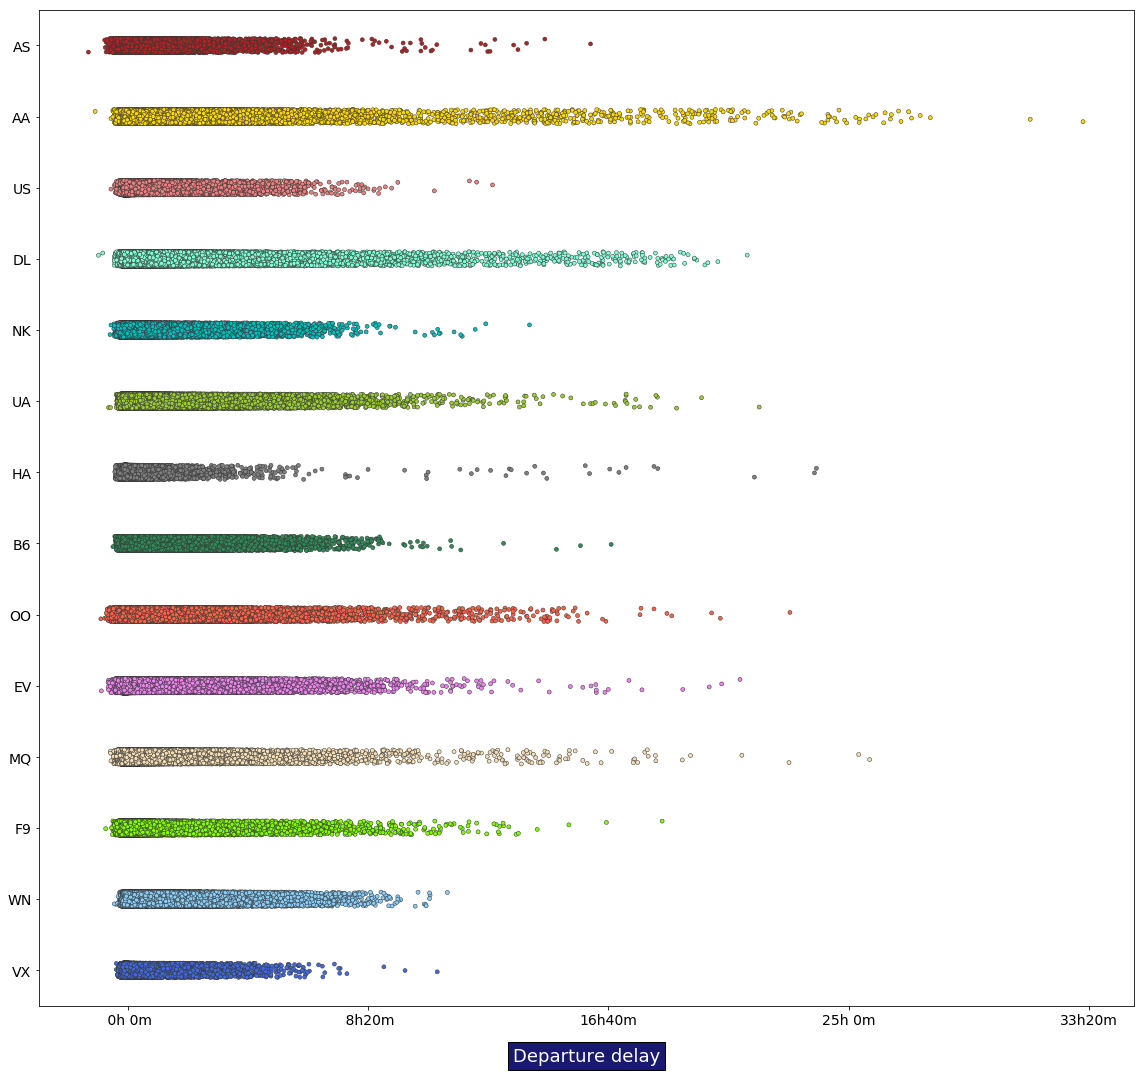

In [8]:
import seaborn as sns

vols = vols.loc[:, ['AIRLINE', 'DEPARTURE_DELAY']]

fig = plt.figure(1, figsize=(16,15))

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
axe = sns.stripplot(y="AIRLINE", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=vols, linewidth = 0.5,  jitter=True)
plt.setp(axe.get_xticklabels(), fontsize=14)
plt.setp(axe.get_yticklabels(), fontsize=14)
axe.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in axe.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
axe.yaxis.label.set_visible(False)
plt.tight_layout(w_pad=3) 
plt.show()

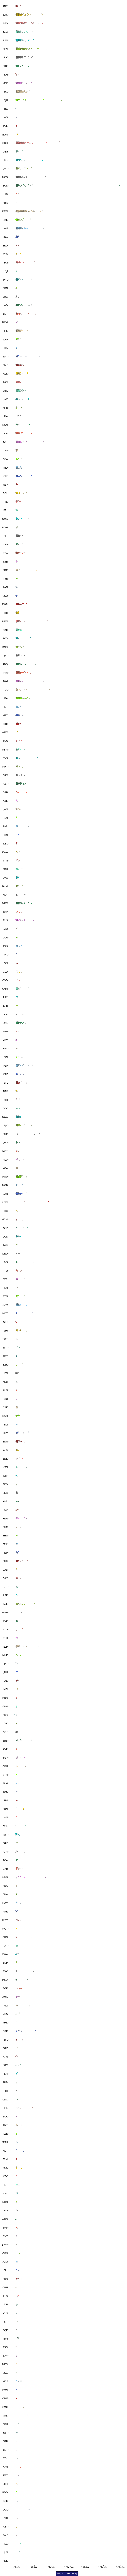

In [38]:
import seaborn as sns

vols = vols.loc[:, ['ORIGIN_AIRPORT', 'DEPARTURE_DELAY']]

fig = plt.figure(1, figsize=(10,200))

colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']
#___________________________________________________________________
axe = sns.stripplot(y="ORIGIN_AIRPORT", x="DEPARTURE_DELAY", size = 4, palette = colors,
                    data=vols, linewidth = 0.5,  jitter=True)
plt.setp(axe.get_xticklabels(), fontsize=14)
plt.setp(axe.get_yticklabels(), fontsize=14)
axe.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in axe.get_xticks()])
plt.xlabel('Departure delay', fontsize=14, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
axe.yaxis.label.set_visible(False)
plt.tight_layout(w_pad=3) 
plt.show()

In [ ]:
sns.set(context="paper")
fig = plt.figure(1, figsize=(8,8))

ax = fig.add_subplot(1,2,1)
subset = airport_mean_delays.iloc[:50,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

ax = fig.add_subplot(1,2,2)    
subset = airport_mean_delays.iloc[50:100,:].rename(columns = abbr_companies)
subset = subset.rename(index = identify_airport)
fig.text(0.5, 1.02, "Delays: impact of the origin airport", ha='center', fontsize = 18)
mask = subset.isnull()
sns.heatmap(subset, linewidths=0.01, cmap="Accent", mask=mask, vmin = 0, vmax = 35)
plt.setp(ax.get_xticklabels(), fontsize=10, rotation = 85) ;
ax.yaxis.label.set_visible(False)

plt.tight_layout()

In [68]:
#Création d'un ensemble de test
from sklearn.model_selection import train_test_split, cross_val_score
#Séparation aléatoire de la base de données en base d'apprentissage (80% de la bdd) et en base de test(20% de la bdd)
vols_apprentissage, vols_test = train_test_split(vols, test_size=0.2, random_state=42)


,ORIGIN_AIRPORT,DEPARTURE_DELAY
6252,JFK,24.0
4684,BTR,3.0
1731,SLC,9.0
4742,LAX,-4.0
4521,BOS,-2.0


In [56]:
#Choix des attributs
num_attributs = ['MONTH', 'DAY', 'DAY_OF_WEEK','DEPARTURE_TIME','SCHEDULED_TIME','DISTANCE','SCHEDULED_ARRIVAL']

In [57]:
y_apprentissage = vols_apprentissage.loc[:,"DEPARTURE_DELAY"]
y_test = vols_test.loc[:,"DEPARTURE_DELAY"]
x_apprentissage = vols_apprentissage.loc[:,num_attributs]
x_test = vols_test.loc[:,num_attributs]

In [4]:
vols_id=vols_apprentissage.reset_index()

In [22]:
#num_attributs = ['MONTH', 'DAY','DEPARTURE_TIME','SCHEDULED_TIME']

X = vols_id[vols_id["MONTH"]==1][vols_id["AIRLINE"]=="F9"].loc[:,num_attributs]

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
vols.loc[:,"AIRLINE"].value_counts()

WN    1242403
DL     870275
AA     712935
OO     576814
EV     554752
UA     507762
MQ     278791
B6     262042
US     194223
AS     171439
NK     115193
F9      90090
HA      76041
VX      61248
Name: AIRLINE, dtype: int64

In [29]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

#PCA
from sklearn.decomposition import KernelPCA
rbf_pca=KernelPCA(n_components=2, kernel="rbf", gamma=0.03)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [30]:
X_reduced=rbf_pca.fit_transform(X) #X est la liste des attibuts quand décide à utiliser pour construire nos modèleS

In [2]:
from sklearn.manifold import Isomap

In [39]:
num_attributs = ['MONTH', 'DAY', 'DAY_OF_WEEK','DEPARTURE_TIME','SCHEDULED_TIME','DISTANCE','SCHEDULED_ARRIVAL']
X = vols_id[vols_id["MONTH"]==1][vols_id["AIRLINE"]=="F9"].loc[:,num_attributs]

C:\Users\Thomas\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [25]:
embedding = Isomap(n_components =2)
X_transformed = embedding.fit_transform(X)
X_transformed.shape

(6735, 2)

In [59]:
#5 min~
from sklearn.ensemble import RandomForestRegressor
#y=vols_id[vols_id["MONTH"]==1][vols_id["AIRLINE"]=="F9"].loc[:,'DEPARTURE_DELAY']
fg = RandomForestRegressor()
fg.fit(x_apprentissage,y_apprentissage)

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [60]:
fg.feature_importances_

array([0.01706855, 0.01174719, 0.00746991, 0.31674836, 0.08840862,
       0.14766371, 0.41089365])

In [67]:
y_predicted = fg.predict(x_test)
y_predicted

array([11.8,  0.6,  8.8, ...,  1.1, -1.9,  4.7])

In [66]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_predicted,y_test)

141.4512360233882

In [71]:
score = cross_val_score(fg, x_apprentissage,y_apprentissage,cv=3)
score

C:\Users\Thomas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.87934822, 0.86687103, 0.87542168])